In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [18]:
ds = pd.read_csv('../results/recall_domains.csv')
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 3 columns):
domain    96 non-null object
recall    96 non-null object
value     96 non-null float64
dtypes: float64(1), object(2)
memory usage: 2.3+ KB


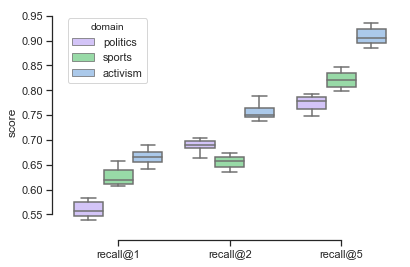

In [43]:
import seaborn as sns
sns.set(style="ticks", palette="pastel")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="recall", y="value", #notch=True, 
            #hatch = 'x',
            hue="domain", palette=["m", "g", 'b'],
            data=ds )
sns.despine(offset=10, trim=True)
plt.ylabel('score')
plt.xlabel('')


plt.savefig('../results/domain_analysis.png')

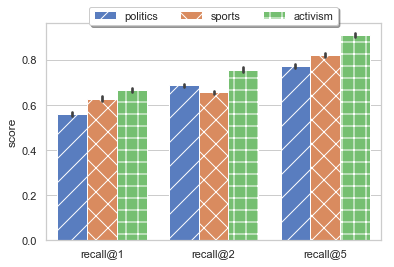

In [53]:
import seaborn as sns
import itertools

sns.set(style="whitegrid")

# Load the example Titanic dataset


# Draw a nested barplot to show survival for class and sex
ax = sns.barplot(x="recall", y="value", hue="domain", data=ds,
                #height=6,
#                legend_loc=''
                #kind="bar",
                 palette="muted")
#ax.despine(left=True)
plt.ylabel('score')
plt.xlabel('')
#plt.tight_layout()
#plt.legend(loc='upper left')

num_locations = 3
hatches = itertools.cycle(['/', 'x', '+', '-', 'x', '\\', '*', 'o', 'O', '.'])
for i, bar in enumerate(ax.patches):
    if i % num_locations == 0:
        hatch = next(hatches)
    bar.set_hatch(hatch)
    
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=3, fancybox=True, shadow=True)

plt.savefig('../results/domain_analysis.png')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

data_a = [[1,2,5], [5,7,2,2,5], [7,2,5]]
data_b = [[6,4,2], [1,2,5,3,2], [2,3,5,1]]

ticks = ['A', 'B', 'C']

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure()

bpl = plt.boxplot(data_a, positions=np.array(xrange(len(data_a)))*2.0-0.4, sym='', widths=0.6)
bpr = plt.boxplot(data_b, positions=np.array(xrange(len(data_b)))*2.0+0.4, sym='', widths=0.6)
set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='Apples')
plt.plot([], c='#2C7BB6', label='Oranges')
plt.legend()

plt.xticks(xrange(0, len(ticks) * 2, 2), ticks)
plt.xlim(-2, len(ticks)*2)
plt.ylim(0, 8)
plt.tight_layout()
#plt.savefig('boxcompare.png')